In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print(sum(np.sum(pd.isnull(training)).tolist()))
# There are no NULL values in training dataset
print(sum(np.sum(pd.isnull(test)).tolist()))
# There are no NULL values in test set

0
0


C:\Users\comin\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# Explorative analyses

In [6]:
training.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,872,vrl,0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,9865,inv,0,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,3190,bct,0,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,3674,bct,0,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,11372,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465


In [5]:
training = training.iloc[:, 1:]

In [8]:
training.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,0.01436,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,inv,0,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,0.01372,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,bct,0,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,0.00848,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,bct,0,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,0.01330,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,0.06240,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465


In [6]:
test = test.iloc[:, 1:]

In [155]:
test.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGA,CGG,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,bct,0,360105,568103,Campylobacter curvus 525.92,0.00959,0.01359,0.01584,0.01312,0.02491,...,0.00354,0.00121,0.00709,0.02980,0.04135,0.02608,0.03877,0.01183,0.00061,0.00117
1,inv,0,135724,6295,Pimpla hypochondriaca,0.01223,0.03447,0.00508,0.01811,0.01176,...,0.00763,0.00524,0.01001,0.02621,0.03368,0.02303,0.03066,0.03479,0.00064,0.00064
2,pln,0,120297,3451,Fusarium oxysporum f. sp. niveum,0.01014,0.03014,0.00145,0.01275,0.01420,...,0.00551,0.00058,0.00174,0.02753,0.02695,0.00637,0.01826,0.03216,0.00116,0.00029
3,pln,0,105351,14867,Aspergillus awamori,0.03551,0.02892,0.00155,0.01117,0.01224,...,0.00303,0.00451,0.00356,0.02865,0.02401,0.01594,0.03390,0.01628,0.00108,0.00047
4,pln,2,280810,1143,chloroplast Cryptothallus mirabilis,0.01662,0.01400,0.02800,0.03412,0.01312,...,0.01662,0.00175,0.01837,0.03062,0.02362,0.03150,0.01575,0.02625,0.00087,0.00525


## Barplots of DNA type in each kingdom

## Barplots of Kingdom in each DNA type


# Pairwise correlation between each pair of codon


In [91]:
train2 = training.iloc[:, 5:]

# General correlations heatmap on kingdom

## Correlations in each kingdom

### arc

In [158]:
training_Kingdom_codons

,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,inv,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,bct,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,bct,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,vrt,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,pln,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,0.01228,0.02401,...,0.00558,0.00893,0.01173,0.03071,0.01954,0.01787,0.02848,0.03127,0.00112,0.00000
10418,vrl,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,0.02313,0.01773,...,0.00477,0.01274,0.01008,0.02070,0.00726,0.02388,0.02233,0.01814,0.00025,0.00038
10419,bct,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,0.04712,0.01920,...,0.01702,0.00175,0.00567,0.02487,0.00000,0.02661,0.02618,0.01353,0.00000,0.00349
10420,pln,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,0.00783,0.04305,...,0.00391,0.01566,0.00391,0.02348,0.01957,0.03523,0.00978,0.00196,0.00000,0.00196


### bct

### phg

### plm

### pln

### inv

### vrt

### mam

### rod

### pri

### vrl

# AGA distribution of each kingdom

# General correlation heatmap on DNAtype

In [69]:
training_DNAtype_codons = training.drop(["Kingdom", "SpeciesID", "Ncodons", "SpeciesName"], axis = 1)
training_DNAtype_codons

,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,0,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,0,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,0,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,1,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,0,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,0.01228,0.02401,...,0.00558,0.00893,0.01173,0.03071,0.01954,0.01787,0.02848,0.03127,0.00112,0.00000
10418,0,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,0.02313,0.01773,...,0.00477,0.01274,0.01008,0.02070,0.00726,0.02388,0.02233,0.01814,0.00025,0.00038
10419,0,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,0.04712,0.01920,...,0.01702,0.00175,0.00567,0.02487,0.00000,0.02661,0.02618,0.01353,0.00000,0.00349
10420,2,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,0.00783,0.04305,...,0.00391,0.01566,0.00391,0.02348,0.01957,0.03523,0.00978,0.00196,0.00000,0.00196


## Correlations in each DNAtype

In [109]:
np.unique(test.loc[:,"DNAtype"])

array([ 0,  1,  2,  4,  5, 11], dtype=int64)

In [110]:
np.unique(training.loc[:,"DNAtype"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11, 12], dtype=int64)

### 0

# fare altri DNAtype

In [31]:
training.head()
training2 = training.drop(['SpeciesID','SpeciesName', 'DNAtype'], axis=1)

# Clustering

# Classification

## LDA

In [7]:
import scipy.stats as stats, pingouin as pg

training.head()

for i in range(5, 69):
    stat, p = stats.shapiro(training.iloc[:, i])
    print(f'Shapiro-Wilk Test per il predittore {training.columns.tolist()[i]} : statistic={stat}, p-value={p}')
print('-------------')


for kingdom in np.unique(training.loc[:, "Kingdom"]):
    hz_test = pg.multivariate_normality(training[training.loc[:, 'Kingdom']==kingdom].iloc[:, 5:])
    print(f" {kingdom} ", hz_test)

C:\Users\comin\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10422.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test per il predittore UUU : statistic=0.9054994184280138, p-value=4.257669043309575e-62
Shapiro-Wilk Test per il predittore UUC : statistic=0.9551949725089622, p-value=1.676723905259903e-48
Shapiro-Wilk Test per il predittore UUA : statistic=0.8155942392754635, p-value=9.559637800631016e-76
Shapiro-Wilk Test per il predittore UUG : statistic=0.9448560576517517, p-value=4.128474666010395e-52
Shapiro-Wilk Test per il predittore CUU : statistic=0.9077502900317171, p-value=1.2456061311844652e-61
Shapiro-Wilk Test per il predittore CUC : statistic=0.9135492720153658, p-value=2.197810633947521e-60
Shapiro-Wilk Test per il predittore CUA : statistic=0.687806285081001, p-value=1.7921157801309084e-87
Shapiro-Wilk Test per il predittore CUG : statistic=0.8392175243101743, p-value=7.80650486176479e-73
Shapiro-Wilk Test per il predittore AUU : statistic=0.921394203675499, p-value=1.3960381012415017e-58
Shapiro-Wilk Test per il predittore AUC : statistic=0.9187381431567672, p-value=3.

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.109480,0.065858,0.122197,0.129656,0.102020,0.163616,0.110474,0.148768,0.133919,0.087101,...,0.045682,0.146636,0.083975,0.199778,0.059535,0.239065,0.140242,0.107348,0.002131,0.002131
1,0.077900,0.161515,0.017211,0.086826,0.088111,0.073404,0.049771,0.192148,0.086826,0.216424,...,0.017211,0.058762,0.090680,0.210644,0.164084,0.238130,0.346663,0.213855,0.001927,0.003211
2,0.159443,0.099991,0.222849,0.083676,0.052406,0.127739,0.064333,0.017180,0.200848,0.109261,...,0.007045,0.109694,0.030838,0.232119,0.155920,0.332975,0.120262,0.138740,0.007478,0.005315
3,0.008985,0.150294,0.085992,0.115756,0.093363,0.091819,0.028009,0.198941,0.176056,0.183287,...,0.082623,0.049489,0.029624,0.232776,0.156471,0.241761,0.166369,0.058334,0.001966,0.004422
4,0.178944,0.100511,0.219826,0.000000,0.352354,0.059629,0.297129,0.079505,0.218696,0.218696,...,0.000000,0.000000,0.000000,0.001129,0.078433,0.139191,0.019876,0.019876,0.000000,0.139191


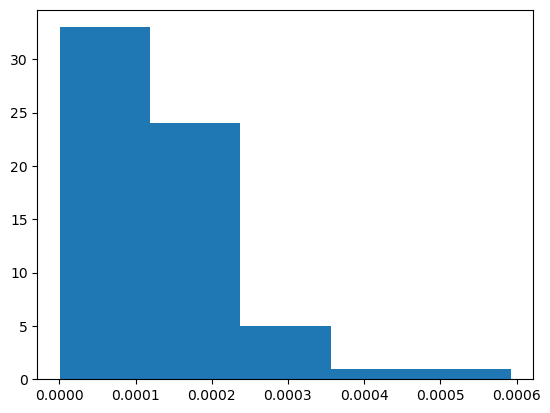

In [34]:
# Marco
# VARIANCE OF EACH VARIABLE

codons_variance = np.var(training.iloc[:, 5:], axis = 0)
plt.hist(codons_variance, bins = 5)

# Uso un test diverso dallo Shapiro-Wilk per testare la Normalità dei dati

for col in range(5, 69):
    mean = np.mean(training.iloc[:, col])
    std = np.std(training.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(training.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: {p_value}")     Tutti rifiutano l'ipotesi di Normalità


#from sklearn import preprocessing
    
#normalized_training = pd.DataFrame(preprocessing.normalize(training.iloc[:, 5:], axis = 1))
#normalized_training.head()

In [56]:
import sklearn

training_with_outliers = training.copy()

for col in range(5, 69):
    considered_variable = training.iloc[:, col].copy()
    Q1 = considered_variable.quantile(0.25)
    Q3 = considered_variable.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    for idx, value in enumerate(considered_variable.tolist()):
        if value < lower or value > upper:
            considered_variable[idx] = True
        else: 
            considered_variable[idx] = False
    training_with_outliers.iloc[:, col] = considered_variable
        


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,207343,6686,Bovine foamy virus,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,inv,0,7629,10060,Anthocidaris crassispina,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,bct,0,320850,14031,Staphylococcus phage X2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,bct,0,1397,39839,Bacillus circulans,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [71]:
lis = []
for row in range(training_with_outliers.shape[0]):
    lis.append(all(training_with_outliers.iloc[row, 5:]))
sum(lis)
    

0

1

# Regression

We want to recover from the data loss of the AGA frequency on test
samples. Train a regressor which can predict the value of the AGA feature
given the remaining ones. Compare different regression algorithms for this
task. Since AGA features are missing in test samples, use only the training
data for this step and make use of robust evaluation techniques to compare
algorithms.

In [92]:
#handle categorical variables
np.unique(training["Kingdom"])

array(['arc', 'bct', 'inv', 'mam', 'phg', 'plm', 'pln', 'pri', 'rod',
       'vrl', 'vrt'], dtype=object)

In [93]:
np.unique(training["DNAtype"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11, 12], dtype=int64)

In [94]:
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values) #when you use an array to index another array in NumPy, it selects rows from the indexed array based on the values in the index array. e[a] selects rows from the identity matrix e based on the values in array a
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

# Convert famhist into a one-hot encoding
training_ohe = onehot_feature(training, 'Kingdom')
training_ohe = onehot_feature(training_ohe, 'DNAtype')

test_ohe = onehot_feature(test, 'Kingdom')
test_ohe = onehot_feature(test_ohe, 'DNAtype')

training_ohe.head()

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,DNAtype_1,DNAtype_11,DNAtype_12,DNAtype_2,DNAtype_3,DNAtype_4,DNAtype_5,DNAtype_6,DNAtype_7,DNAtype_9
0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# data preparation: train
cols_to_keep_train = training_ohe.drop(['AGA','SpeciesID','SpeciesName'], axis=1)
column_names_train = cols_to_keep_train.columns.tolist()
X_train = training_ohe[column_names_train].to_numpy()
y_train = training_ohe['AGA'].to_numpy()

#prove
X_train_prova = training.iloc[:, 5:]
cols_to_keep_train_prova = X_train_prova.drop(['AGA'], axis=1)
column_names_train_prova = cols_to_keep_train_prova.columns.tolist()
X_train_prova = training_ohe[column_names_train].to_numpy()
y_train_prova = training_ohe['AGA'].to_numpy()

In [96]:
# data preparation: test
cols_to_keep_test = test_ohe.drop(['SpeciesID','SpeciesName'], axis=1)
column_names_test = cols_to_keep_test.columns.tolist()
X_test = test_ohe[column_names_test].to_numpy()
#y_test = training_ohe['AGA'].to_numpy()

#prove
X_test_prova = test.iloc[:, 5:]
column_names_test_prova = X_test_prova.columns.tolist()
X_test_prova = test_ohe[column_names_test_prova].to_numpy()
#y_test_prova = test_ohe['AGA'].to_numpy()

In [97]:
from sklearn.linear_model import LinearRegression  # 1- model selection
model = LinearRegression(fit_intercept=True)       # 2- hyperparams
model.fit(X_train, y_train)                        # 3- model fitting
y_predict = model.predict(X_train)                 # 4- model testing

#prove
from sklearn.linear_model import LinearRegression  # 1- model selection
model = LinearRegression(fit_intercept=True)       # 2- hyperparams
model.fit(X_train_prova, y_train_prova)            # 3- model fitting
y_predict = model.predict(X_train_prova)           # 4- model testing

In [99]:
print("The intercept is {:0.3f}".format(model.intercept_))
for idx, col_name in enumerate(column_names_train):
    print("The coefficient for {} is {:0.3f}".format(col_name, model.coef_[idx]))

The intercept is 1.000
The coefficient for Ncodons is 0.000
The coefficient for UUU is -1.000
The coefficient for UUC is -1.000
The coefficient for UUA is -1.000
The coefficient for UUG is -1.000
The coefficient for CUU is -1.000
The coefficient for CUC is -1.000
The coefficient for CUA is -1.000
The coefficient for CUG is -1.000
The coefficient for AUU is -1.000
The coefficient for AUC is -1.000
The coefficient for AUA is -1.000
The coefficient for AUG is -1.000
The coefficient for GUU is -1.000
The coefficient for GUC is -1.000
The coefficient for GUA is -1.000
The coefficient for GUG is -1.000
The coefficient for GCU is -1.000
The coefficient for GCC is -1.000
The coefficient for GCA is -1.000
The coefficient for GCG is -1.000
The coefficient for CCU is -1.000
The coefficient for CCC is -1.000
The coefficient for CCA is -1.000
The coefficient for CCG is -1.000
The coefficient for UGG is -1.000
The coefficient for GGU is -1.000
The coefficient for GGC is -1.000
The coefficient for GG

In [100]:
#prove
print("The intercept is {:0.3f}".format(model.intercept_))
for idx, col_name in enumerate(column_names_train_prova):
    print("The coefficient for {} is {:0.3f}".format(col_name, model.coef_[idx]))

The intercept is 1.000
The coefficient for UUU is 0.000
The coefficient for UUC is -1.000
The coefficient for UUA is -1.000
The coefficient for UUG is -1.000
The coefficient for CUU is -1.000
The coefficient for CUC is -1.000
The coefficient for CUA is -1.000
The coefficient for CUG is -1.000
The coefficient for AUU is -1.000
The coefficient for AUC is -1.000
The coefficient for AUA is -1.000
The coefficient for AUG is -1.000
The coefficient for GUU is -1.000
The coefficient for GUC is -1.000
The coefficient for GUA is -1.000
The coefficient for GUG is -1.000
The coefficient for GCU is -1.000
The coefficient for GCC is -1.000
The coefficient for GCA is -1.000
The coefficient for GCG is -1.000
The coefficient for CCU is -1.000
The coefficient for CCC is -1.000
The coefficient for CCA is -1.000
The coefficient for CCG is -1.000
The coefficient for UGG is -1.000
The coefficient for GGU is -1.000
The coefficient for GGC is -1.000
The coefficient for GGA is -1.000
The coefficient for GGG is

In [101]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score ", r2_score(y_train, y_predict))
print("MSE score ", mean_squared_error(y_train, y_predict))

R2 score  0.9999803534704436
MSE score  1.4522171279272175e-09


In [102]:
#prove
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score ", r2_score(y_train_prova, y_predict))
print("MSE score ", mean_squared_error(y_train_prova, y_predict))

R2 score  0.9999803534704436
MSE score  1.4522171279272175e-09


In [103]:
# ===============================================
#        Code from Lab02.01 - 27/03/2024
# 02.01.StatisticalLearningLinearRegression.ipynb
# ===============================================
from scipy.stats import t, f

def rss(y_true, y_pred): #implementation from the last lab session (already exist in SKLearn)
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y): #function to train the model using least, last time you implemented by scratch 
    # Helper function that uses scikit-learn models
    # and behaves as the function we implemented in
    # Lab02.01
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs #this function is doing t test for each feature, and we check to see if there is any statistical evidence that each feature is correlated to the outcome (rejectH0)
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df
 
# H0: all features in the subset are equal to 0    #F test, within subset of features at least one is relevant (H0=all features are zero if we accept it none of the feature is usefuk)
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [104]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1) #single array of all parameters in the model (number of betas and one as a feature)
show_stats(X_train, y_train, betas, ['Intercept', *column_names_train], alpha=0.001) #increasing number of features probability of making an error is increasing, with 100 features, we have 100% of probability of making at least one error

C:\Users\39388\AppData\Local\Temp\ipykernel_13240\2668412445.py:42: RuntimeWarning: invalid value encountered in sqrt
  se_b = np.sqrt(se2_b)


,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,9.999491e-01,4.652051e+01,0.021495,0.982851,False
1,Ncodons,7.899595e-14,6.267644e-13,0.126038,0.899705,False
2,UUU,-9.999137e-01,9.088857e-05,-11001.534371,0.000000,True
3,UUC,-9.999830e-01,1.046000e-04,-9560.064371,0.000000,True
4,UUA,-9.999723e-01,1.006980e-04,-9930.413110,0.000000,True
...,...,...,...,...,...,...
82,DNAtype_4,-6.571454e-06,5.382692e+00,-0.000001,0.999999,False
83,DNAtype_5,1.568568e-05,5.382692e+00,0.000003,0.999998,False
84,DNAtype_6,3.516917e-05,5.382692e+00,0.000007,0.999995,False
85,DNAtype_7,4.198496e-05,5.382692e+00,0.000008,0.999994,False


In [141]:
from sklearn.model_selection import train_test_split

mpg_test_size = 0.3
mpg_test_seed = 40
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=mpg_test_size, random_state=mpg_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

X_train.shape  (7295, 64)
X_test.shape  (3127, 64)


In [142]:
X_all_features_train = cols_to_keep_train.columns.to_list()
X_all_features_test = cols_to_keep_test.columns.to_list()

In [145]:
X_train_pd = pd.DataFrame(X_train, columns=X_all_features_train)
X_test_pd = pd.DataFrame(X_test, columns=X_all_features_test)
y_train_pd = pd.DataFrame(y_train)

In [147]:
X_train_pd

,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,DNAtype_1,DNAtype_11,DNAtype_12,DNAtype_2,DNAtype_3,DNAtype_4,DNAtype_5,DNAtype_6,DNAtype_7,DNAtype_9
3868,NaN,0.00585,0.01942,0.01053,0.01194,0.00655,0.00000,0.01264,0.01568,0.01451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7501,NaN,0.00722,0.01430,0.03581,0.01726,0.01281,0.00162,0.00560,0.00364,0.03466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9114,NaN,0.01600,0.02707,0.00820,0.01518,0.01025,0.02379,0.00820,0.04758,0.01559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8204,NaN,0.00593,0.03066,0.02374,0.03363,0.02967,0.00593,0.02374,0.01187,0.04154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,NaN,0.00000,0.02609,0.02415,0.00290,0.04348,0.03768,0.07343,0.00966,0.05217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,NaN,0.01111,0.02180,0.01357,0.01543,0.00782,0.00596,0.01028,0.01193,0.02283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3603,NaN,0.01276,0.01677,0.00911,0.01568,0.02479,0.01641,0.00911,0.03026,0.02151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,NaN,0.01312,0.01894,0.03946,0.01470,0.01611,0.00889,0.01761,0.01304,0.02882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5426,NaN,0.02495,0.01651,0.00509,0.01528,0.01177,0.01546,0.00457,0.04726,0.01739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
alpha = 0.001 #to check if at least one of the features is useful we perform a F-test, and be sure to safely remove them

df_train_piccolo = 
features = 

p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha: #if p values is below alpha we reject the null hypothesis
    print("Reject H0: There is evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")
    #we got the same but alpha value doesn't chnage as we add some more features

NameError: name 'features' is not defined

# Feature selection

In [127]:
X_all_features_train = cols_to_keep_train.columns.to_list()
X_all_features_test = cols_to_keep_test.columns.to_list()

In [134]:
y_train

array([0.02064, 0.00915, 0.01775, ..., 0.00175, 0.01566, 0.01754])

In [135]:
X_train_pd = pd.DataFrame(X_train, columns=X_all_features_train)
X_test_pd = pd.DataFrame(X_test, columns=X_all_features_test)

In [132]:
#This code defines a function get_evaluator that takes a scorer function as input and returns another function called evaluator.
#The purpose of get_evaluator is to create an "evaluator" function that can apply the provided scorer to evaluate models.
def get_evaluator(scorer): 
    def evaluator(model, X, y, trained=False): #nested function that takes a model, X, y, and an optional trained parameter. The trained parameter is used to indicate if the model has already been trained.
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

In [138]:
X_train_pd.shape, y_train.shape, X_test_pd.shape, y_test.shape

((10422, 86), (10422,), (2606, 81), (3127,))

In [ ]:
def estimate_sigma(Xtrain_pd, ytrain):
    # Sigma is usually estimated using the model with all features
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))
